# Step8 演習01 ニューラルネットワークの基礎
---

ロジスティック回帰は線形分離不可能なデータ（Kクラスの場合K-1本の線で分離できないデータ）を解くことが困難でした。

ニューラルネットワークは線形分離不可能なデータを解くときに威力を発揮します。

Step8演習01 では、ロジスティック回帰とニューラルネットワークのモデルをそれぞれ構築し、線形分離不可能なデータの分類に取り組んでみます。

今回は学習済みのパラメータを使って「線形分離不可能なデータ」の予測の結果を考察し、ニューラルネットワークが強力であることを体験してもらいます。

** はじめに **

* for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

** 本演習の目的 **

* （復習）ロジスティック回帰とニューラルネットワークの違いを学ぶ。
* 線形分離不可能なデータの分類に取り組む。
* 学習済みのパラメータがあれば、モデルの精度の予測はフォワードプロパゲーションを１度だけ行えばいいことを体験する。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [Numpy](http://www.numpy.org/)　数値計算を行うための基本パッケージの公式ドキュメント
- [Matplotlib](https://matplotlib.org/)　グラフ描画ライブラリの基本パッケージの公式ドキュメント

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番**に順次実行してください。

** 注意：** 初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 線形分離不可能なデータセット

線形分離不可能なデータセットの例として今回はXNORを使います。

XNORは、入力 $x$=[0,0], [1,1], [0,1], [1,0] のときの出力 y=[1,1,0,0] となります。

<table style="width:30%">

	<thead>
	<tr>
		<th >入力$X_1$</th>
		<th >入力$X_2$</th>
		<th >出力$y$</th>
	</tr>
	</thead>

  <tr>
    <td>0</td>
    <td> 0 </td> 
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td>1</td>
    <td> 1 </td> 
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td>0</td>
    <td> 1 </td> 
    <td> 0 </td> 
  </tr>
 
     <tr>
    <td>1</td>
    <td> 0 </td> 
    <td> 0 </td> 
  </tr>
  
</table>

In [2]:
# 入力データ
x = np.array([[0, 0], [1, 1], [0, 1],[1, 0]])
# 正解
y = np.array([[1], [1], [0], [0]])

In [3]:
x

array([[0, 0],
       [1, 1],
       [0, 1],
       [1, 0]])

In [4]:
y

array([[1],
       [1],
       [0],
       [0]])

## データを可視化してみよう

下のセルを実行してください。入力 $x$ と $y$ の関係をプロットします。

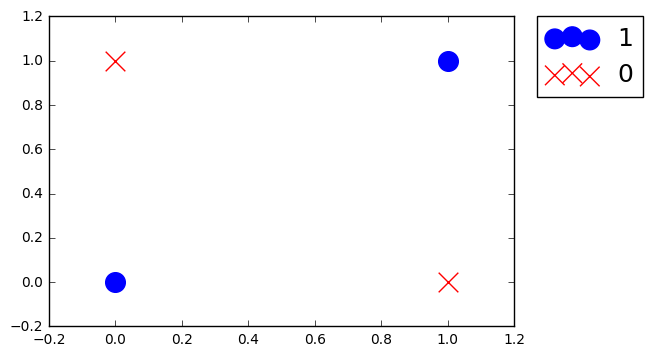

In [5]:
plt.scatter(x[0][0], x[0][1], s=200, color='blue',  marker='o', label='1')
plt.scatter(x[1][0], x[1][1], s=200, color='blue', marker='o')
plt.scatter(x[2][0], x[2][1], s=200, color='red', marker='x',  label='0')
plt.scatter(x[3][0], x[3][1], s=200, color='red', marker='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.show()

## （復習）ロジスティック回帰とニューラルネットワーク

ロジスティック回帰のモデルとニューラルネットワークのモデルを確認しましょう。

ロジスティック回帰とニューラルネットワークの大きな違いは隠れ層の有無でした。

下の画像の左がロジスティック回帰、右がニューラルネットワークになっています。

<div align="center"  style="width:95%">
<img src="./dataStep8/logi_nn_model.png"></div>

## ロジスティック回帰では線形分離不可能なデータを分類できないことを確認しよう

下記の条件で、入力層と出力層のみのロジスティック回帰を構築します：

- 入力層のユニット数 ２
- 出力層のユニット数 １

scikit-learnを用いてロジスティック回帰問題を解いてみましょう。

In [6]:
from sklearn.linear_model import LogisticRegression #ロジスティック回帰
x = np.array([[0, 0], [1, 1], [0, 1],[1, 0]])
y = np.array([1, 1, 0, 0])
estimator = LogisticRegression() #インスタンスを作成
estimator.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

結果を確認してみましょう。predict()に[0, 0], [1, 1], [0, 1],[1, 0]を与え、結果として[1, 1, 0, 0]を予想してくれれば正しく分類できたことになります。

In [7]:
estimator.predict(x)

array([0, 0, 0, 0])

ロジスティック回帰では、線形分離不可能なデータをうまく分類できないことを確認できたと思います。

次に、ニューラルネットワークを使うことで線形分離不可能なデータを分類できることを確認したいと思います。

## ニューラルネットワークを用いて線形分離不可能なデータを分類できることを確認しよう

下記の条件で、ロジスティック回帰モデルに隠れ層を追加したニューラルネットワークを構築します：

それぞれの層のユニット数は次のようにします。

- 入力層のユニット数 ２
- 隠れ層のユニット数 2
- 出力層のユニット数 １

まず、 ニューラルネットワークで利用するシグモイド関数を実装しましょう。

** 【課題１】 ** シグモイド関数の出力を返す関数 sigmoid(x) を実装してください。

**Note:**
シグモイド関数の定義です。

$$\sigma{(x)}=\frac{1}{1+e^{-x}}$$

In [8]:
#Coursemale-02 Step8 QuestionNumber1 6f252b88ed53473e789755bb160e13ea
def sigmoid(x):
###############ここを穴埋めしてください###############
    y = 1 / (1 + np.exp(-x))
######################################################
    return y

** 左上の保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [9]:
%%bash
./validation_client.py male-02 8 1 Step8_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



次に、ニューラルネットワークのフォワードプロパゲーションを実装しましょう。

** 【課題２】 ** フォワードプロパゲーションの出力を返す関数forward_propagation(X, W1,b1, W2, b2)を上図を確認しながら実装してください。

**Note：**

隠れ層と出力層の活性化関数はシグモイド関数とします。

１番目の層（隠れ層）：<br>
$layer1\_z = w_1\cdot{x}+b_1$ <br>
$layer1\_a = sigmoid(layer1\_z)$

２番目の層（出力層）：<br>
$layer2\_z = w_2\cdot{layer1\_a}+b_2$<br>
$layer2\_a = sigmoid(layer2\_z)$

In [21]:
#Coursemale-02 Step8 QuestionNumber2 1e76ceb297e3d331dcf8a88c9b296d9e
def forward_propagation(X, W1, b1, W2, b2):
###############ここを穴埋めしてください###############
    layer1_z = np.dot(X, W1) + b1
    layer1_a = sigmoid(layer1_z)
    layer2_z = np.dot(layer1_a, W2) + b2
    layer2_a = sigmoid(layer2_z) 
######################################################
    return layer2_a

** 左上の保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [22]:
%%bash
./validation_client.py male-02 8 2 Step8_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



またこのニューラルネットワークの** 学習済みのモデルのパラメータ**を用意しました。下のセルを実行するとパラメータを読み込むことができます。

In [23]:
#パラメータを読み込む
import h5py
with h5py.File('./dataStep8/step8_nn_parameter.h5', 'r') as f:
    W1 = np.array(f['W1'])
    b1 = np.array(f['b1'])
    W2 = np.array(f['W2'])
    b2 = np.array(f['b2'])

#### 重み$w$とバイアス$b$を確認してみる

下のセルを実行して重み $w$ バイアス $b$ の中身を確認してみましょう。

In [24]:
W1

array([[-5.35529467, -5.7287608 ],
       [ 5.55512995,  5.61549819]])

In [25]:
b1

array([[ 2.68838282, -3.07986451]])

In [26]:
W2

array([[ 8.15284251],
       [-8.45500275]])

In [27]:
b2

array([[-3.82772975]])

この学習済みのパラメータを使ってニューラルネットワークの出力の結果の確認を行いましょう。正しく分類できることを確認してください。

In [28]:
output = forward_propagation(x, W1,b1, W2, b2)

In [29]:
print(output)

[[0.96876625]
 [0.97239592]
 [0.02898801]
 [0.03559071]]


出力（ output） の最初の２つが１に近く、残りの２つがゼロに近ければ、ニューラルネットワークでは想定していた分類結果である $y = [1,1,0,0]$ を予測できたことになります。

<table style="width:30%">

	<thead>
	<tr>
		<th >入力$X_1$</th>
		<th >入力$X_2$</th>
		<th >出力$y$</th>
	</tr>
	</thead>

  <tr>
    <td>0</td>
    <td> 0 </td> 
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td>1</td>
    <td> 1 </td> 
    <td> 1 </td> 
  </tr>
  
    <tr>
    <td>0</td>
    <td> 1 </td> 
    <td> 0 </td> 
  </tr>
 
     <tr>
    <td>1</td>
    <td> 0 </td> 
    <td> 0 </td> 
  </tr>
  
</table>

## おつかれさまでした。

Step8の演習を通して、改めて線形分離不可能なデータの場合、ニューラルネットワークが強力であることを学習できたと思います。

本演習ではニューラルネットワークはフォワードプロパーゲションまでしか行いませんでした。また、モデルのパラメータを求め、確認することはしませんでした。

以降のステップで、scikit-learnやスクラッチ実装したニューラルネットワークのモデルの学習後のパラメータの確認や、テスト利用する場合について考えてみることにします。

そしてマルチクラス分類問題への応用にも取り組みます。